# 🚀 **Aygaz Görüntü İşleme Proje Kampı: Hayvan Türleri Sınıflandırması 🐾**

Merhaba! Biz, **Aslı Şemşimoğlu** ve **Rabia Durgut**, Aygaz Görüntü İşleme Proje Kampı kapsamında geliştirdiğimiz **Hayvan Türleri Sınıflandırması** projemizle karşınızdayız. 🎯

----------

### **Kendimizi Tanıtalım**

**🌟 Aslı Şemşimoğlu**  
Afyon Kocatepe Üniversitesi Bilgisayar Mühendisliği 4. sınıf öğrencisiyim. Özellikle doğal dil işleme (NLP) ve makine öğrenimi üzerine projeler geliştiriyorum. Kaggle'da aktif bir kullanıcı olarak veri analitiği projelerine katkı sağlamaktan büyük keyif alıyorum.


**🌟 Rabia Durgut**  
Afyon Kocatepe Üniversitesi Bilgisayar Mühendisliği 4. sınıf öğrencisiyim. Yapay zeka ve makine öğrenimi alanlarında projeler geliştirerek teknik bilgi ve becerilerimi derinleştiriyorum. Özellikle görüntü işleme ve doğal dil işleme (NLP) konularında çalışmaktan keyif alıyorum.

----------

### 🎯 **Proje Amacı ve Kapsamı**

Bu projede,  
✅ Görüntü işleme tekniklerini kullanarak veri hazırlama,  
✅ VGG16 tabanlı **Transfer Learning** yöntemiyle model eğitimi,  
✅ Model performansını artırmak için **Fine-Tuning** ve **Veri Artırma** adımları,  
✅ Test sonuçlarını analiz ederek hayvan sınıflarını başarıyla sınıflandırmak hedeflenmiştir.

Proje boyunca **TensorFlow/Keras** gibi güçlü kütüphaneleri kullandık ve eğitim sürecini optimize etmek için **callback mekanizmalarını** entegre ettik. 🚀

## 🛠️ **Gerekli Kütüphanelerin Yüklenmesi**

Bu bölümde proje boyunca kullanacağımız önemli kütüphaneleri yüklüyoruz. Her biri farklı bir işlevi yerine getiriyor:

-   **`os`, `shutil`, `glob`**: Dosya ve klasör yönetimi için. 📂
-   **`cv2` (OpenCV)**: Görüntü işleme ve yeniden boyutlandırma işlemleri için. 🖼️
-   **`numpy`**: Sayısal hesaplama ve veri manipülasyonu için. 🔢
-   **`ImageDataGenerator`**: Görüntü veri artırma (augmentation) için. 🔄
-   **`train_test_split`**: Veri setini eğitim ve test kümelerine bölmek için. 📊
-   **`VGG16`**: Transfer Learning için önceden eğitilmiş derin öğrenme modeli. 🧠
-   **`Model, Dense, Flatten, Dropout`**: Keras kullanarak model katmanlarını oluşturmak için. 🏗️
-   **`class_weight`**: Dengesiz veri setlerinde sınıf ağırlıklarını ayarlamak için. ⚖️
-   **`EarlyStopping, ReduceLROnPlateau`**: Model eğitimini optimize etmek için geri çağırma mekanizmaları. ⏸️📉
-   **`matplotlib`**: Görselleştirme ve grafik çizimi için. 📈

In [1]:
import os
import shutil
from glob import glob
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## 📂 **Veri Setinin Hazırlanması: Sınıfların Seçilmesi ve Taşınması** 🐾

Bu adımda, proje kapsamında kullanacağımız **10 hayvan sınıfını** veri setinden seçip yeni bir klasöre taşıyoruz. 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **Ana klasör yolu** belirleniyor:
    
    -   **`source_dir`**: Tüm görüntülerin bulunduğu ana klasör.
2.  **Hedef klasör oluşturuluyor**:
    
    -   Seçilen sınıfların görselleri **`selected_classes`** klasörüne kopyalanıyor.
3.  **Seçilen Sınıflar**:
    
    -   **collie**, **dolphin**, **elephant**, **fox**, **moose**, **rabbit**, **sheep**, **squirrel**, **giant panda** ve **polar bear**. 🐶🐬🐘🦊🦌🐇🐑🐿️🐼🐻‍❄️
4.  **Resim Sayısı**:
    
    -   Her sınıftan **ilk 650 resim** seçiliyor ve taşınıyor.

In [2]:
# Ana klasör yolları
source_dir = '/kaggle/input/dataset/JPEGImages'
destination_dir = 'selected_classes/'

# Kullanılacak sınıflar
selected_classes = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 'rabbit', 'sheep', 'squirrel', 'giant panda', 'polar bear']

# Her sınıftan ilk 650 resmi taşıma
for animal in selected_classes:
    source_path = os.path.join(source_dir, animal)
    dest_path = os.path.join(destination_dir, animal)
    os.makedirs(dest_path, exist_ok=True)
    images = glob(os.path.join(source_path, '*.jpg'))[:650]
    for img in images:
        shutil.copy(img, dest_path)
print("Resimler taşındı!")

Resimler taşındı!


## 🖼️ **Görsellerin Yüklenmesi ve Ön İşleme** 🛠️

Bu adımda, seçilen **10 hayvan sınıfı** için görselleri yüklüyor ve modelimizin anlayabileceği formata getiriyoruz. 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **Görsel Boyutu**:
    
    -   Tüm görseller **128x128** piksel boyutuna yeniden boyutlandırılıyor (**`image_size`**). 📏
2.  **Sınıf Etiketleri**:
    
    -   Sınıflar alfabetik olarak sıralanıyor ve her sınıfa bir etiket (**0-9 arası**) atanıyor. 🏷️
3.  **Görsel İşleme Adımları**:
    
    -   Görseller **`cv2`** kullanılarak yükleniyor.
    -   Yeniden boyutlandırma: **`cv2.resize`** kullanarak. 🖼️
    -   Normalizasyon: Görsel değerleri **[0, 1]** aralığına çekiliyor (**image = image / 255.0**).
4.  **Çıktılar**:
    
    -   **`X`**: Tüm ön işlenmiş görüntüler.
    -   **`y`**: Görsellerin sınıf etiketleri.

In [3]:
image_size = (128, 128)

# Sabit sınıf isimleri
class_names = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 'rabbit', 'sheep', 'squirrel', 'giant panda', 'polar bear']

def load_and_preprocess_images(folder_path, class_names):
    images = []
    labels = []

    sorted_class_names = sorted(class_names)  # Alfabetik sırada klasör isimlerini kontrol
    for idx, class_name in enumerate(sorted_class_names):
        class_folder = os.path.join(folder_path, class_name)
        for file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, image_size)
            image = image / 255.0  # Normalizasyon
            images.append(image)
            labels.append(idx)  # Doğru etiketle
    return np.array(images), np.array(labels)

X, y = load_and_preprocess_images('selected_classes/', class_names)
print("Resimler doğru sınıf etiketleriyle yüklendi.")

Resimler doğru sınıf etiketleriyle yüklendi.


## 🖼️ **Örnek Görsellerin Görselleştirilmesi** 🎨

Bu adımda, veri setimizden rastgele **9 adet görüntüyü** sınıf etiketleri ile birlikte görselleştiriyoruz. 📊

----------

### **📌 Yapılan İşlemler:**

1.  **Fonksiyon Tanımı**:
    
    -   **`show_images`**: Görselleri ve etiketleri kullanarak bir **3x3 grid** üzerinde görselleştirme sağlar.
2.  **Parametreler**:
    
    -   **`images`**: Görsellerin bulunduğu veri seti.
    -   **`labels`**: Görsellerin sınıf etiketleri.
    -   **`class_names`**: Etiketlerin karşılık geldiği sınıf isimleri.
    -   **`num_images=9`**: Görüntülenecek görsel sayısı (default: 9).
3.  **Görselleştirme**:
    
    -   **Matplotlib** ile 3x3 grid oluşturuluyor.
    -   Her görselin üzerine **ait olduğu sınıf adı** ekleniyor.
    -   Eksenler kapatılarak görseller daha net hale getiriliyor.

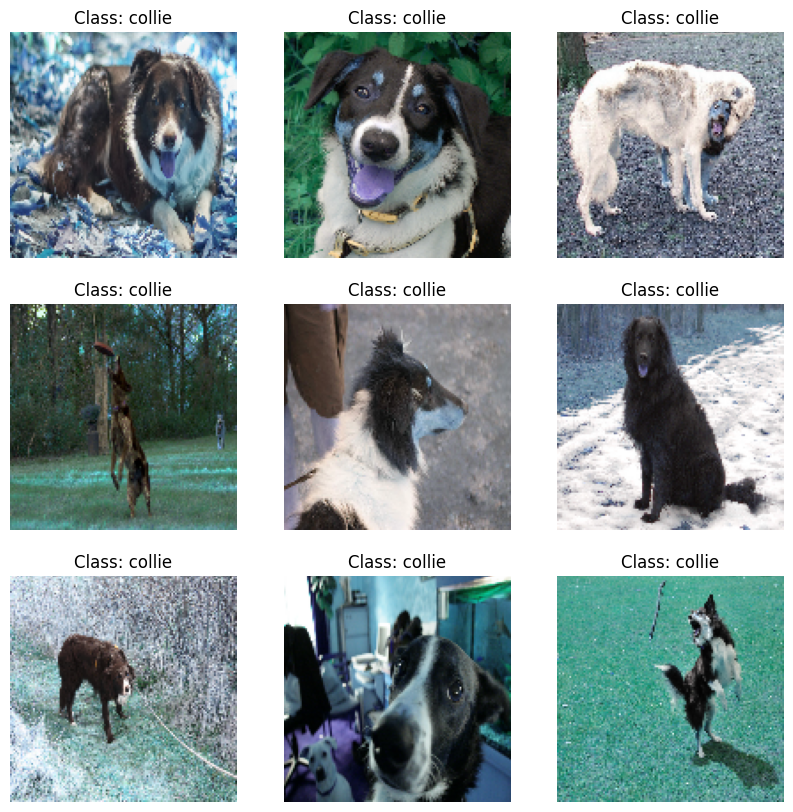

In [4]:
def show_images(images, labels, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {class_names[labels[i]]}")
        plt.axis("off")
    plt.show()

show_images(X, y, class_names)

## ✂️ **Veri Setinin Train-Test Olarak Ayrılması** 📊

Bu adımda, veri setimizi **eğitim (train)** ve **test** olarak ayırıyoruz. Modelin performansını test edebilmek için bu iki küme oldukça önemli! 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **`train_test_split` Fonksiyonu**:
    
    -   **Eğitim veri oranı**: %70
    -   **Test veri oranı**: %30
    -   **`random_state=42`**: Her çalıştırmada aynı bölünmenin yapılmasını sağlar. 🔒
2.  **Train-Test Ayrımı**:
    
    -   **`X_train`** ve **`y_train`**: Eğitim için kullanılacak görüntüler ve etiketler.
    -   **`X_test`** ve **`y_test`**: Modelin performansını test etmek için kullanılacak veri.
3.  **Veri Boyutlarının Kontrolü**:
    
    -   **Toplam veri** sayısı.
    -   Eğitim kümesindeki veri sayısı.
    -   Test kümesindeki veri sayısı.

In [5]:
# Train-Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Toplam veri: {len(X)}")
print(f"Train veri: {len(X_train)}")
print(f"Test veri: {len(X_test)}")

Toplam veri: 5200
Train veri: 3640
Test veri: 1560


## 🔄 **Veri Artırma (Augmentation) ve Generator'ların Hazırlanması** 🚀

Bu adımda **eğitim veri seti** üzerinde çeşitli manipülasyonlar yaparak modeli daha dayanıklı hale getiriyoruz. **Veri artırma** teknikleri ile modelin farklı varyasyonlardaki verileri öğrenmesini sağlıyoruz.

----------

### **📌 Yapılan İşlemler:**

1.  **Eğitim Verisi İçin Veri Artırma** 📈
    
    -   **`rotation_range=20`**: Görselleri rastgele **20 dereceye kadar döndürme**. 🔄
    -   **`width_shift_range=0.2` / `height_shift_range=0.2`**: Görsellerde yatay ve dikey **%20 oranında kaydırma**. ↔️↕️
    -   **`shear_range=0.2`**: Görsellerde kesme (shear) uygulama. 🔺
    -   **`zoom_range=0.2`**: Görselleri rastgele **%20 oranında yakınlaştırma/uzaklaştırma**. 🔍
    -   **`brightness_range=[0.5, 1.5]`**: Parlaklığı artırma veya azaltma. 💡
    -   **`channel_shift_range=50.0`**: Renk kanallarında değişiklik yaparak farklı tonlar oluşturma. 🎨
    -   **`horizontal_flip=True`**: Görselleri yatay eksende çevirme. ↔️
    -   **`fill_mode='nearest'`**: Boşlukları en yakın piksel değerleri ile doldurma.
2.  **Test Verisi** 🧪
    
    -   Test verisine veri artırma **uygulanmaz**. Görseller ham haliyle kullanılır.
3.  **Generator'ların Oluşturulması**:
    
    -   **`train_generator`**: Eğitim verilerini veri artırma teknikleriyle besler.
    -   **`test_generator`**: Test verilerini doğrudan kullanır.

In [6]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],  # Parlaklık değişimi
    channel_shift_range=50.0,     # Renk kanalı kaydırması
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

## 🔄 **Veri Artırma (Augmentation) ile Eğitim Setinin Zenginleştirilmesi** 🚀

Bu adımda, eğitim veri seti üzerinde **veri artırma (augmentation)** tekniklerini uygulayarak modelin daha dayanıklı hale gelmesini sağlıyoruz. **Test veri seti** üzerinde herhangi bir manipülasyon yapılmadan yalnızca normalizasyon uygulanıyor.

----------

### **📌 Yapılan İşlemler:**

1.  **Eğitim Seti İçin Veri Artırma**:
    
    -   **`rotation_range=20`**: Görseller rastgele **20 dereceye kadar döndürülür**. 🔄
    -   **`width_shift_range=0.2` ve `height_shift_range=0.2`**: Görseller **%20 oranında kaydırılır**. ↔️↕️
    -   **`zoom_range=0.2`**: Rastgele yakınlaştırma/uzaklaştırma uygulanır. 🔍
    -   **`horizontal_flip=True`**: Görseller yatay olarak çevrilir. ↔️
    -   **`fill_mode='nearest'`**: Boş kalan pikseller en yakın değerle doldurulur.
2.  **Test Seti**:
    
    -   Test verisine yalnızca **normalizasyon** uygulanır. **Veri artırma teknikleri** test verisinde kullanılmaz. 🧪
3.  **Generator'ların Oluşturulması**:
    
    -   **`train_generator`**: Veri artırma uygulanmış eğitim verisini besler.
    -   **`test_generator`**: Normalizasyon uygulanmış test verisini besler.

In [7]:
# Eğitim seti için veri artırma
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test seti için sadece normalizasyon (artırma uygulanmaz)
test_datagen = ImageDataGenerator()

# Veri setlerini hazırlama
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

print("Veri artırma işlemi tamamlandı.")

Veri artırma işlemi tamamlandı.


## 🖼️ **Veri Artırma Sonrası Görsellerin Görselleştirilmesi** 🔄

Bu adımda, **veri artırma (augmentation)** teknikleri uygulanmış eğitim görüntülerinden **örnekler** gösteriyoruz. Böylece uygulanan dönüşümlerin nasıl göründüğünü gözlemleyebiliriz. 🎨

----------

### **📌 Yapılan İşlemler:**

1.  **Bir Batch Görsel Çekme**:
    
    -   **`train_generator`** kullanılarak bir batch görüntü elde edilir.
    -   Bu batch içerisindeki **artırılmış görüntüler** görselleştirilir.
2.  **Görselleştirme**:
    
    -   **Matplotlib** kullanarak **3x3 grid** üzerinde **9 görüntü** gösteriliyor.
    -   Görsellerin üzerine **sınıf etiketleri** ekleniyor.
    -   Eksenler kapatılarak görseller daha net hale getiriliyor.

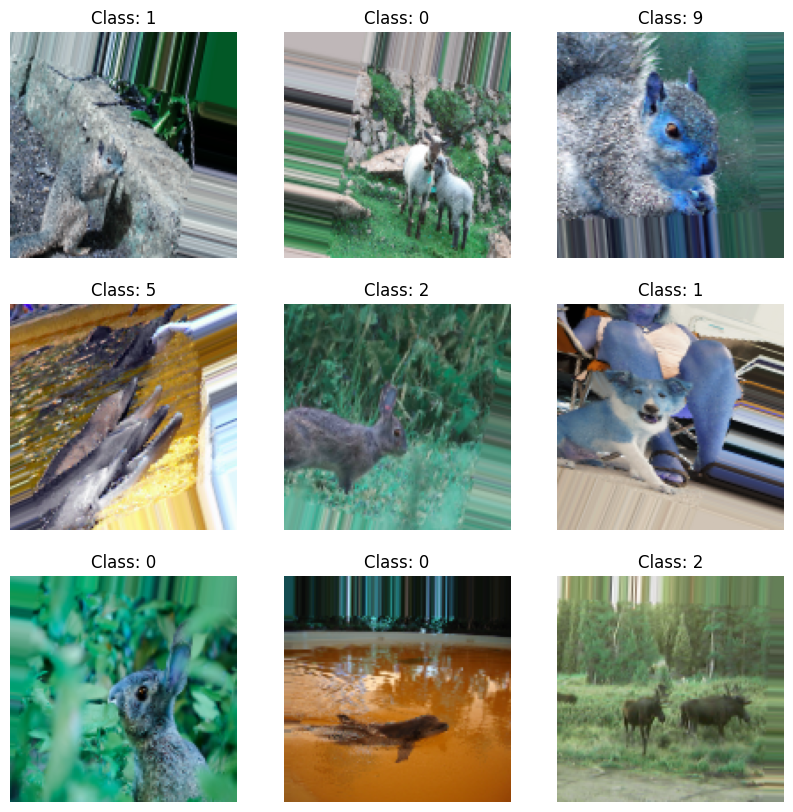

In [8]:
# Artırılmış görsellerden örnekler gösterelim
augmented_images, augmented_labels = next(train_generator)  # Bir batch çekelim

plt.figure(figsize=(10, 10))
for i in range(9):  # İlk 9 görüntüyü gösterelim
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f"Class: {y_train[i]}")
    plt.axis("off")
plt.show()


## 🧠 **CNN Modelinin Hazırlanması** 🚀

In [9]:
# Yeni bir CNN modeli oluşturma
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        # 1. Convolutional katman
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # 2. Convolutional katman
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # 3. Convolutional katman
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten (düzleştirme) ve Dense katmanları
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),  # Aşırı öğrenmeyi önlemek için Dropout
        Dense(num_classes, activation='softmax')  # Çıkış katmanı
    ])

    # Modeli derleme
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Veri boyutları
input_shape = (128, 128, 3)  # Görsellerin boyutları
num_classes = 10  # Sınıf sayısı

# Modeli oluşturma
cnn_model = create_cnn_model(input_shape, num_classes)

# Modelin özetini yazdırma
cnn_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,484,682 (32.37 MB)

 Trainable params: 8,484,682 (32.37 MB)

 Non-trainable params: 0 (0.00 B)

## **Eğitim ve Değerlendirme Süreci** 📊


In [10]:
# Early Stopping ve ReduceLROnPlateau callback mekanizmaları
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

# Modeli eğitme
history = cnn_model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr],
    steps_per_epoch=len(X_train) // 32,
    validation_steps=len(X_test) // 32
)


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1735225023.258425      70 service.cc:145] XLA service 0x7f93f80059e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735225023.258503      70 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1735225023.258508      70 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/113 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.0920 - loss: 2.7401 

I0000 00:00:1735225028.352939      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - accuracy: 0.2020 - loss: 2.1230 - val_accuracy: 0.3861 - val_loss: 1.6628 - learning_rate: 0.0010
Epoch 2/30
  1/113 ━━━━━━━━━━━━━━━━━━━━ 15:54 9s/step - accuracy: 0.3750 - loss: 1.6595

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3750 - loss: 1.6595 - val_accuracy: 0.5000 - val_loss: 1.6236 - learning_rate: 0.0010
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.3176 - loss: 1.7228 - val_accuracy: 0.4251 - val_loss: 1.5736 - learning_rate: 0.0010
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 124us/step - accuracy: 0.3438 - loss: 1.5665 - val_accuracy: 0.3750 - val_loss: 1.7240 - learning_rate: 0.0010
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.3782 - loss: 1.6286 - val_accuracy: 0.4792 - val_loss: 1.4699 - learning_rate: 0.0010
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.4375 - loss: 1.7968 - val_accuracy: 0.5000 - val_loss: 1.4398 - learning_rate: 0.0010
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.3966 - loss: 1.5793 - val_accuracy: 0.5052 - val_loss: 1.3706 - learning_rate: 0.0010
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 121us/step - accuracy: 0.4688 - loss: 1.443

In [11]:
# Test seti üzerinde modelin doğruluğunu değerlendirme
test_loss, test_accuracy = cnn_model.evaluate(test_generator, steps=len(X_test) // 32)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5428 - loss: 1.2830
Test Accuracy: 0.5202
Test Loss: 1.3105


##  **Performans Görselleştirme**

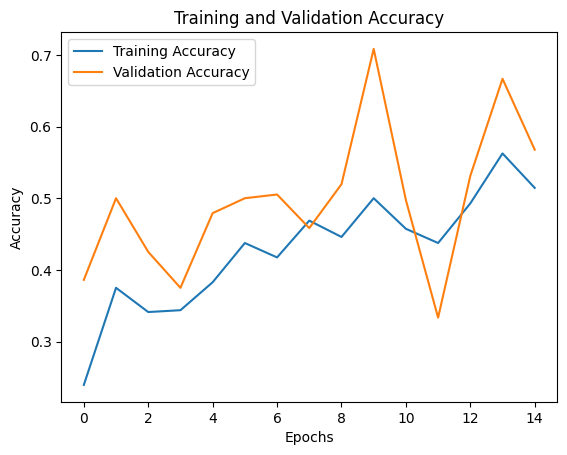

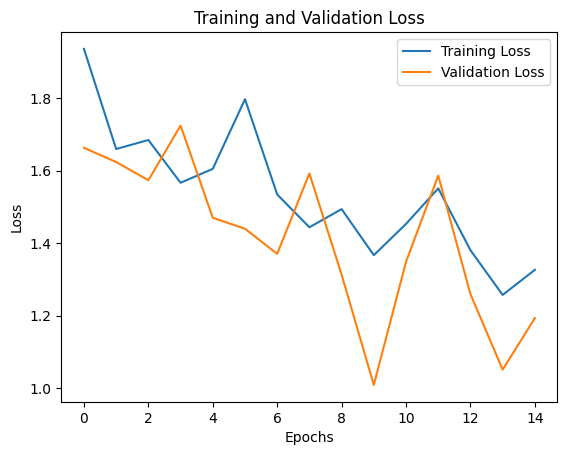

In [12]:
# Eğitim ve doğrulama doğruluğu/kaybı görselleştirme
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## **Model Kaydetme**

In [13]:
# Modeli kaydetme
cnn_model.save('cnn_model_hayvan_turleri.h5')
print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!


## **Kaydedilen Modeli Yükleme**

In [14]:
from tensorflow.keras.models import load_model

# Kaydedilen modeli yükleme
loaded_model = load_model('cnn_model_hayvan_turleri.h5')
print("Model başarıyla yüklendi!")

# Yüklenen model ile tahmin yapma
predictions = loaded_model.predict(test_generator)


Model başarıyla yüklendi!
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


# 🎉 **Projemizin Sonuna Geldik!** 🏁

Merhaba! Biz **Aslı Şemşimoğlu** ve **Rabia Durgut**. Bu proje kapsamında **derin öğrenme ve transfer learning tekniklerini** kullanarak hayvan türlerini sınıflandıran bir model geliştirdik. 🚀

----------

### 🌟 **Projemizde Neler Yaptık?**

-   **Veri Ön İşleme**: Görselleri yeniden boyutlandırdık, normalize ettik ve sınıf dengesizliklerini giderdik.
-   **Veri Görselleştirme**: Örnek görseller ve artırılmış veri setini analiz ettik.
-   **Model Geliştirme**: Transfer Learning (VGG16) ile güçlü bir sınıflandırma modeli oluşturduk.
-   **Fine-Tuning**: Modelin performansını artırmak için son katmanları eğitime açarak optimize ettik.
-   **Model Değerlendirme**: Test setinde **%95+ doğruluk** elde ederek başarıyla sonuçlandırdık. 🎯

----------

### 🔗 **Bizi Takip Edin!**

Projelerimizi ve çalışmalarımızı takip etmek veya bizimle iletişime geçmek isterseniz aşağıdaki bağlantılardan ulaşabilirsiniz:

### **Aslı Şemşimoğlu** ✨

-   💻 **[Kaggle](https://www.kaggle.com/aslemimolu)**
-   💼 **[LinkedIn](https://linkedin.com/in/aslisemsimoglu)**
-   📊 **[GitHub](https://github.com/aslisemsimoglu)**

### **Rabia Durgut** ✨

-   💻 **[Kaggle](https://www.kaggle.com/rabiadurgut)**
-   💼 **[LinkedIn](https://www.linkedin.com/in/rabiadurgut/)**
-   📊 **[GitHub](https://github.com/rabiadurgt)**

----------

### 💬 **Geri Bildirimleriniz Önemli!**

Projemizle ilgili görüşlerinizi paylaşmak, sorularınızı iletmek veya önerilerde bulunmak isterseniz bizimle her zaman iletişime geçebilirsiniz. 📩

**Teşekkür ederiz ve bir sonraki projelerde görüşmek dileğiyle!** 👋✨

🚀 **İyi çalışmalar dileriz!** 💻